# Step 1: 1-D Linear Convection

The 1-D Linear Convection equation:

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$

After discretizing the equation, solving for unknown to advance in time:

$$
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x} \left( u_i^n - u_{i-1}^n \right)
$$

In [1]:
import numpy
from matplotlib import pyplot
import time, sys

In [2]:
%matplotlib inline

In [3]:
nx = 41         # No. of points in grid
dx = 2 / (nx-1) # Length of each spacial step
nt = 25         # No. of points in time
dt = .025       # Duration of each time step
c  = 1          # Speed of the wave

In [12]:
u = numpy.ones(nx)
u[int(.5/dx): int(1/dx + 1)] = 2 # Initial condition of u = 2 b/w 0.5 and 1
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


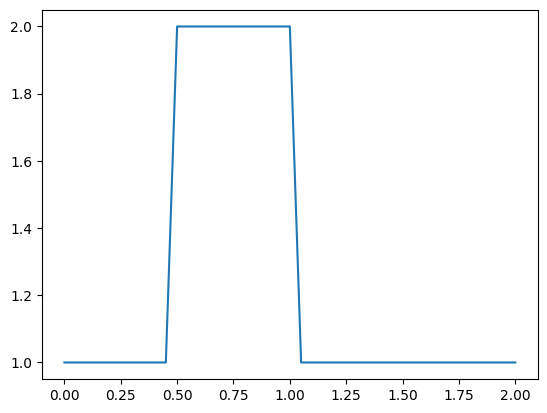

In [13]:
pyplot.plot(numpy.linspace(0, 2, nx), u)

In [14]:
un = numpy.ones(nx) # Temporary array to store solution of u for next time step
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

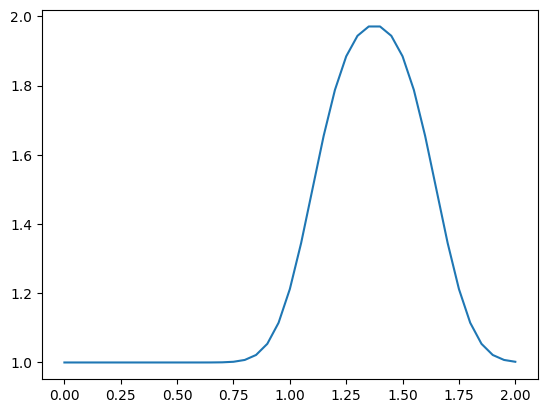

In [16]:
pyplot.plot(numpy.linspace(0, 2, nx), u);